In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [47]:
# plot에서 한글 폰트 설정(안 하면 한글이 깨져서 나옴)
font_name = matplotlib.font_manager.FontProperties(
        fname='c:/windows/fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)
# 한글폰트 지정 후 음수부호를 정확하게 표시하기 위해 추가할 코드
matplotlib.rcParams['axes.unicode_minus']=False

# 경기 각 시군별 반려동물 관련 업체 소요 조사

    - 반려동물 스토어 오픈시 위치 선정

In [48]:
csv_petRegisted = pd.read_csv('data\반려동물등록현황.csv', encoding="cp949")

In [49]:
csv_petRegisted.shape

(729, 14)

In [50]:
# 각 시군별 등록된 반려동물 자료
df_petRegisted = pd.DataFrame(csv_petRegisted)
df_petRegisted1 = df_petRegisted[['시군명','읍면동명','등록동물수(마리)','(RFID종류)내장형','(RFID종류)외장형','(RFID종류)인식표','동물소유자당등록동물수','데이터기준일자']]
df_petRegisted1

,시군명,읍면동명,등록동물수(마리),(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,동물소유자당등록동물수,데이터기준일자
0,가평군,가평읍,941,596,294,51,NaN,2022-06-14
1,가평군,북면,289,176,93,20,NaN,2022-06-14
2,가평군,상면,399,217,153,29,NaN,2022-06-14
3,가평군,설악면,1111,446,612,53,NaN,2022-06-14
4,가평군,조종면,416,218,161,37,NaN,2022-06-14
...,...,...,...,...,...,...,...,...
724,화성시,청계동,2046,1052,879,115,1.22,2022-05-31
725,화성시,팔탄면,753,345,305,103,1.83,2022-05-31
726,화성시,향남읍,5180,2110,2584,486,1.39,2022-05-31
727,화성시,활초동,15,4,11,0,1.36,2022-05-31


In [51]:
# 마스킹
# 시군별 조사자료중 합계를 같이 제출한 시군을 걸러내는 마스크 생성
mask = df_petRegisted1['읍면동명'].isin(['합계'])
df_petRegisted2 = df_petRegisted1[~mask]

In [52]:
df_petRegisted2

,시군명,읍면동명,등록동물수(마리),(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,동물소유자당등록동물수,데이터기준일자
0,가평군,가평읍,941,596,294,51,NaN,2022-06-14
1,가평군,북면,289,176,93,20,NaN,2022-06-14
2,가평군,상면,399,217,153,29,NaN,2022-06-14
3,가평군,설악면,1111,446,612,53,NaN,2022-06-14
4,가평군,조종면,416,218,161,37,NaN,2022-06-14
...,...,...,...,...,...,...,...,...
724,화성시,청계동,2046,1052,879,115,1.22,2022-05-31
725,화성시,팔탄면,753,345,305,103,1.83,2022-05-31
726,화성시,향남읍,5180,2110,2584,486,1.39,2022-05-31
727,화성시,활초동,15,4,11,0,1.36,2022-05-31


In [53]:
# 인덱스 삭제
del df_petRegisted2['읍면동명']
df_petRegisted2

,시군명,등록동물수(마리),(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,동물소유자당등록동물수,데이터기준일자
0,가평군,941,596,294,51,NaN,2022-06-14
1,가평군,289,176,93,20,NaN,2022-06-14
2,가평군,399,217,153,29,NaN,2022-06-14
3,가평군,1111,446,612,53,NaN,2022-06-14
4,가평군,416,218,161,37,NaN,2022-06-14
...,...,...,...,...,...,...,...
724,화성시,2046,1052,879,115,1.22,2022-05-31
725,화성시,753,345,305,103,1.83,2022-05-31
726,화성시,5180,2110,2584,486,1.39,2022-05-31
727,화성시,15,4,11,0,1.36,2022-05-31


In [54]:
# 시군별 필요한 자료 추려서 총합 도출
df_petRegisted2_sum = df_petRegisted2.groupby('시군명')[['등록동물수(마리)']].sum()
df_petRegisted2_sum

,등록동물수(마리)
시군명,
가평군,4017
고양시,73477
과천시,2974
광명시,20161
광주시,29042
구리시,12381
군포시,15480
김포시,7912
남양주시,42957


### 시군별 등록된 반려동물 총합

<AxesSubplot:xlabel='시군명'>

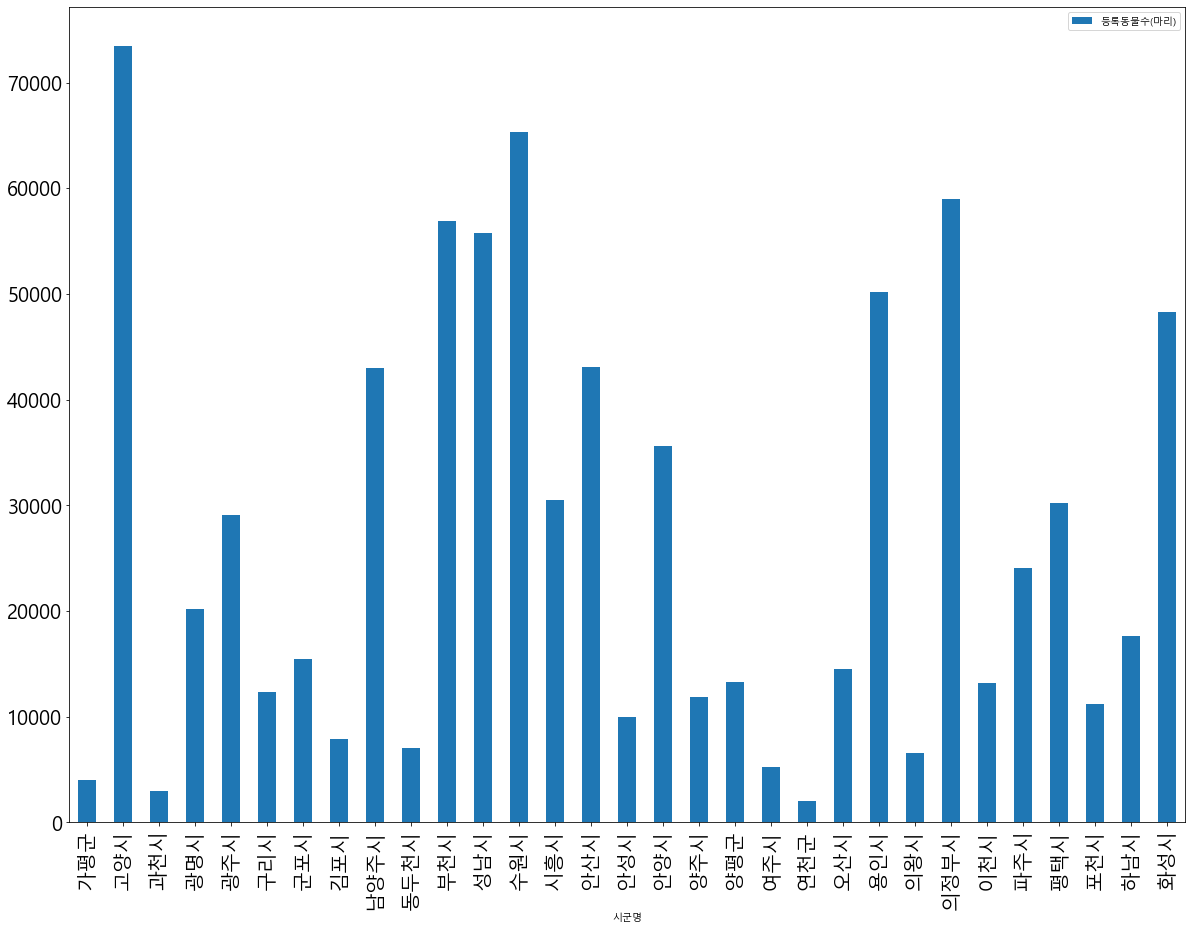

In [55]:
df_petRegisted2_sum.plot(kind='bar',figsize=(20,15),fontsize=20)

### 시군별 등록된 반려동물 평균

In [56]:
df_petRegisted2_mean = df_petRegisted2.groupby('시군명')[['등록동물수(마리)','동물소유자당등록동물수']].mean()
df_petRegisted2_mean

,등록동물수(마리),동물소유자당등록동물수
시군명,,
가평군,669.500000,NaN
고양시,1386.358491,1.515094
과천시,297.400000,1.329000
광명시,2520.125000,1.330000
광주시,1320.090909,1.565455
구리시,1768.714286,1.372857
군포시,15480.000000,1.260000
김포시,527.466667,1.304000
남양주시,2684.812500,1.417500


In [57]:
# git에서 안깨지게 저장
df_petRegisted2_mean.to_csv("df_petRegisted2_mean.csv", encoding='utf-8')
df_petRegisted2_sum.to_csv("df_petRegisted2_sum.csv", encoding='utf-8')

# 반려동물 판매업체 현황

In [58]:
csv_petSaleCompany = pd.read_csv('data\반려동물판매업체현황.csv', encoding="cp949")

In [59]:
csv_petSaleCompany.shape

(14454, 21)

In [60]:
# 말소, 폐업, 휴업 종류는 제거.
df_petSaleCompany = pd.DataFrame(csv_petSaleCompany)
df_petSaleCompany1 = df_petSaleCompany[['시군명','인허가일자','영업상태명']]
df_petSaleCompany1

,시군명,인허가일자,영업상태명
0,가평군,20080909,말소
1,가평군,20160517,말소
2,가평군,20170227,말소
3,가평군,20150120,말소
4,가평군,20100311,말소
...,...,...,...
14449,화성시,20211119,폐업
14450,화성시,20170530,휴업
14451,NaN,20200909,말소
14452,NaN,20220126,말소


In [61]:
df_petSaleCompany1.set_index('시군명', inplace = True)

In [62]:
df_petSaleCompany1

,인허가일자,영업상태명
시군명,,
가평군,20080909,말소
가평군,20160517,말소
가평군,20170227,말소
가평군,20150120,말소
가평군,20100311,말소
...,...,...
화성시,20211119,폐업
화성시,20170530,휴업
NaN,20200909,말소


In [63]:
# 마스킹, 정상운영하는 업체만 선정해서 카운트
mask = df_petSaleCompany1['영업상태명'].isin(['정상'])
df_petSaleCompany2 = df_petSaleCompany1[mask]
df_petSaleCompany2['업체수'] = 1

C:\Users\admin\AppData\Local\Temp\ipykernel_7840\653972546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petSaleCompany2['업체수'] = 1


In [64]:
df_petSaleCompany2

,인허가일자,영업상태명,업체수
시군명,,,
가평군,20181106,정상,1
가평군,20180622,정상,1
가평군,20180518,정상,1
가평군,20170227,정상,1
가평군,20190412,정상,1
...,...,...,...
화성시,20170126,정상,1
화성시,20211206,정상,1
화성시,20211207,정상,1


In [74]:
df_petSaleCompany_sum = df_petSaleCompany2.groupby('시군명')['업체수'].sum()
df_petSaleCompany_sum

시군명
가평군      22
고양시      59
과천시       1
광주시      33
구리시      11
군포시       1
김포시     111
남양주시     41
동두천시      7
부천시       8
성남시       2
수원시       7
시흥시       8
안산시      10
안성시      44
안양시      17
양주시      37
양평군      91
여주시      56
연천군      36
오산시       2
용인시      42
의왕시       2
의정부시      4
이천시      47
파주시     101
평택시      38
포천시      60
하남시       1
화성시      77
Name: 업체수, dtype: int64

## 카운트 결과 비정상적인 결과 도출 DB자체적인 문제를 확인
## 양질의 결과를 위해 동물병원 추가 수집

In [67]:
df_petSaleCompany_sum.to_csv("df_petSaleCompany_sum.csv", encoding='utf-8')
df_petSaleCompany_openDays.to_csv("df_petSaleCompany_openDays.csv", encoding='utf-8')

NameError: name 'df_petSaleCompany_openDays' is not defined

- 팀에서 정상영업중인 병원의 좌표가 필요하여 추가 데이터 종합

In [68]:
csv_animal_hospital = pd.read_csv('data\동물병원현황.csv', encoding="cp949")
df_animal_hospital = pd.DataFrame(csv_animal_hospital)
df_animal_hospital1 = df_animal_hospital[['시군명','영업상태명','WGS84위도','WGS84경도']]
df_animal_hospital1

,시군명,영업상태명,WGS84위도,WGS84경도
0,가평군,말소,37.824850,127.514941
1,가평군,말소,37.826180,127.513519
2,가평군,말소,37.824850,127.514941
3,가평군,말소,37.735775,127.415869
4,가평군,정상,37.824454,127.514711
...,...,...,...,...
2440,화성시,폐업,37.217104,126.974960
2441,화성시,폐업,37.209125,127.060734
2442,화성시,폐업,37.214664,126.736673
2443,화성시,폐업,37.143351,126.918810


In [69]:
mask = df_animal_hospital1['영업상태명'].isin(['정상'])
df_animal_hospital2 = df_animal_hospital1[mask]
df_animal_hospital2['업체수'] = 1

C:\Users\admin\AppData\Local\Temp\ipykernel_7840\4270880844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_animal_hospital2['업체수'] = 1


In [70]:
df_animal_hospital2

,시군명,영업상태명,WGS84위도,WGS84경도,업체수
4,가평군,정상,37.824454,127.514711,1
5,가평군,정상,37.833123,127.508921,1
6,가평군,정상,37.735775,127.415869,1
7,가평군,정상,37.677775,127.490385,1
8,가평군,정상,37.820426,127.346423,1
...,...,...,...,...,...
2395,화성시,정상,37.032462,126.853184,1
2396,화성시,정상,37.236313,127.061388,1
2397,화성시,정상,37.202716,127.123719,1
2398,화성시,정상,37.208818,127.063147,1


In [71]:
df_animal_hospital2.set_index('시군명', inplace = True)

In [76]:
df_animal_hospital2_sum = df_animal_hospital2.groupby('시군명')['업체수'].sum()

In [77]:
df_animal_hospital2_sum

시군명
가평군       9
고양시     117
과천시      12
광명시      16
광주시      34
구리시      19
군포시      13
김포시      44
남양주시     55
동두천시      9
부천시      66
성남시     118
수원시     109
시흥시      38
안산시      39
안성시      31
안양시      48
양주시      21
양평군      15
여주시      12
연천군       7
오산시      15
용인시     110
의왕시      14
의정부시     33
이천시      33
파주시      42
평택시      53
포천시      22
하남시      30
화성시      82
Name: 업체수, dtype: int64

### 펫 스토어 + 동물병원 취합하여 정리

In [78]:
df_sum_hospital_petSaleCompany = pd.concat([df_petSaleCompany_sum,df_animal_hospital2_sum])

In [333]:
df_sum_hospital_petSaleCompany

시군명
가평군    22
고양시    59
과천시     1
광주시    33
구리시    11
       ..
파주시    42
평택시    53
포천시    22
하남시    30
화성시    82
Name: 업체수, Length: 61, dtype: int64

In [79]:
df_sum_hospital_petSaleCompany.to_csv('utf-병원_펫샵_총합.csv', encoding='utf-8')

In [80]:
df_animal_hospital2.to_csv('utf-병원_위도_경도.csv', encoding='utf-8')

In [81]:
df_animal_hospital1 = df_animal_hospital[['시군명','사업장명','영업상태명','WGS84위도','WGS84경도']]
df_animal_hospital1

,시군명,사업장명,영업상태명,WGS84위도,WGS84경도
0,가평군,가평축산농협 동물병원,말소,37.824850,127.514941
1,가평군,가평동물병원,말소,37.826180,127.513519
2,가평군,가평축산농협 동물병원,말소,37.824850,127.514941
3,가평군,경기동물병원,말소,37.735775,127.415869
4,가평군,가평축산농협 동물병원,정상,37.824454,127.514711
...,...,...,...,...,...
2440,화성시,EDC동물병원,폐업,37.217104,126.974960
2441,화성시,동탄동물병원,폐업,37.209125,127.060734
2442,화성시,송산종합가축병원,폐업,37.214664,126.736673
2443,화성시,백산동물병원,폐업,37.143351,126.918810


In [82]:
mask = df_animal_hospital1['영업상태명'].isin(['정상'])
df_animal_hospital2 = df_animal_hospital1[mask]
df_animal_hospital2.set_index('시군명', inplace = True)

In [83]:
df_animal_hospital2

,사업장명,영업상태명,WGS84위도,WGS84경도
시군명,,,,
가평군,가평축산농협 동물병원,정상,37.824454,127.514711
가평군,우랑동물병원(산업동물출장진료전문병원),정상,37.833123,127.508921
가평군,경기동물병원,정상,37.735775,127.415869
가평군,설악동물병원,정상,37.677775,127.490385
가평군,현리동물병원,정상,37.820426,127.346423
...,...,...,...,...
화성시,누리팜 산업동물병원,정상,37.032462,126.853184
화성시,힐링동물의료센터,정상,37.236313,127.061388
화성시,쥬만지동물의료센터,정상,37.202716,127.123719


In [84]:
df_animal_hospital2.to_csv('utf-병원_위도_경도.csv', encoding='utf-8')

# 팀원이 정리한 지역별 인구 조사표에 반려동물 사업체 추가

In [85]:
csv_result = pd.read_csv('근도씨 정리파일.csv')
csv_result.rename(columns = {'행정구역명': '시군명'}, inplace = True)
csv_result

,Unnamed: 0,연도,시군명,총 인구수,총 동물수
0,0,2022,가평군,62168,4017
1,1,2022,고양시,1079277,73477
2,2,2022,과천시,78301,2974
3,3,2022,광명시,290756,20161
4,4,2022,광주시,388893,29042
5,5,2022,구리시,191011,12381
6,6,2022,군포시,267493,15480
7,7,2022,김포시,485609,7912
8,8,2022,남양주시,734642,42957
9,9,2022,동두천시,93260,6998


In [86]:
del csv_result['Unnamed: 0']
del csv_result['연도']
df_result = csv_result.set_index('시군명')
df_result

,총 인구수,총 동물수
시군명,,
가평군,62168,4017
고양시,1079277,73477
과천시,78301,2974
광명시,290756,20161
광주시,388893,29042
구리시,191011,12381
군포시,267493,15480
김포시,485609,7912
남양주시,734642,42957


In [87]:
df_sum_hospital_petSaleCompany = df_sum_hospital_petSaleCompany.to_frame()
df_sum_hospital_petSaleCompany

,업체수
시군명,
가평군,22
고양시,59
과천시,1
광주시,33
구리시,11
...,...
파주시,42
평택시,53
포천시,22


In [88]:
df_result1 = pd.merge(df_result,df_sum_hospital_petSaleCompany,how='outer', on='시군명')
df_result1

,총 인구수,총 동물수,업체수
시군명,,,
가평군,62168,4017,22
가평군,62168,4017,9
고양시,1079277,73477,59
고양시,1079277,73477,117
과천시,78301,2974,1
...,...,...,...
포천시,148469,11168,22
하남시,323558,17634,1
하남시,323558,17634,30


- 병합하고나니 이상한 데이터가 포함된 값이 잘라내기

In [89]:
df_result1 = df_result1.iloc[::2]
df_result1

,총 인구수,총 동물수,업체수
시군명,,,
가평군,62168,4017,22
고양시,1079277,73477,59
과천시,78301,2974,1
광명시,290756,20161,16
광주시,388893,29042,34
구리시,191011,12381,19
군포시,267493,15480,13
김포시,485609,7912,44
남양주시,734642,42957,55


In [90]:
df_result1.to_csv('utf-df_result_population_aniamals_company.csv', encoding='utf-8')

In [91]:
# 도시별로 총 인구수 / 총 동물수 해서 어떤 도시에서 상대적으로 많은 동물을 키우는지
# 상대적으로 많이 키우고 있는 도시에서의 반려동물 관련 업체의 숫자는 어떤지 확인.

In [92]:
df_total_animal = df_result1['총 동물수']
df_total_human = df_result1['총 인구수']

<AxesSubplot:xlabel='시군명'>

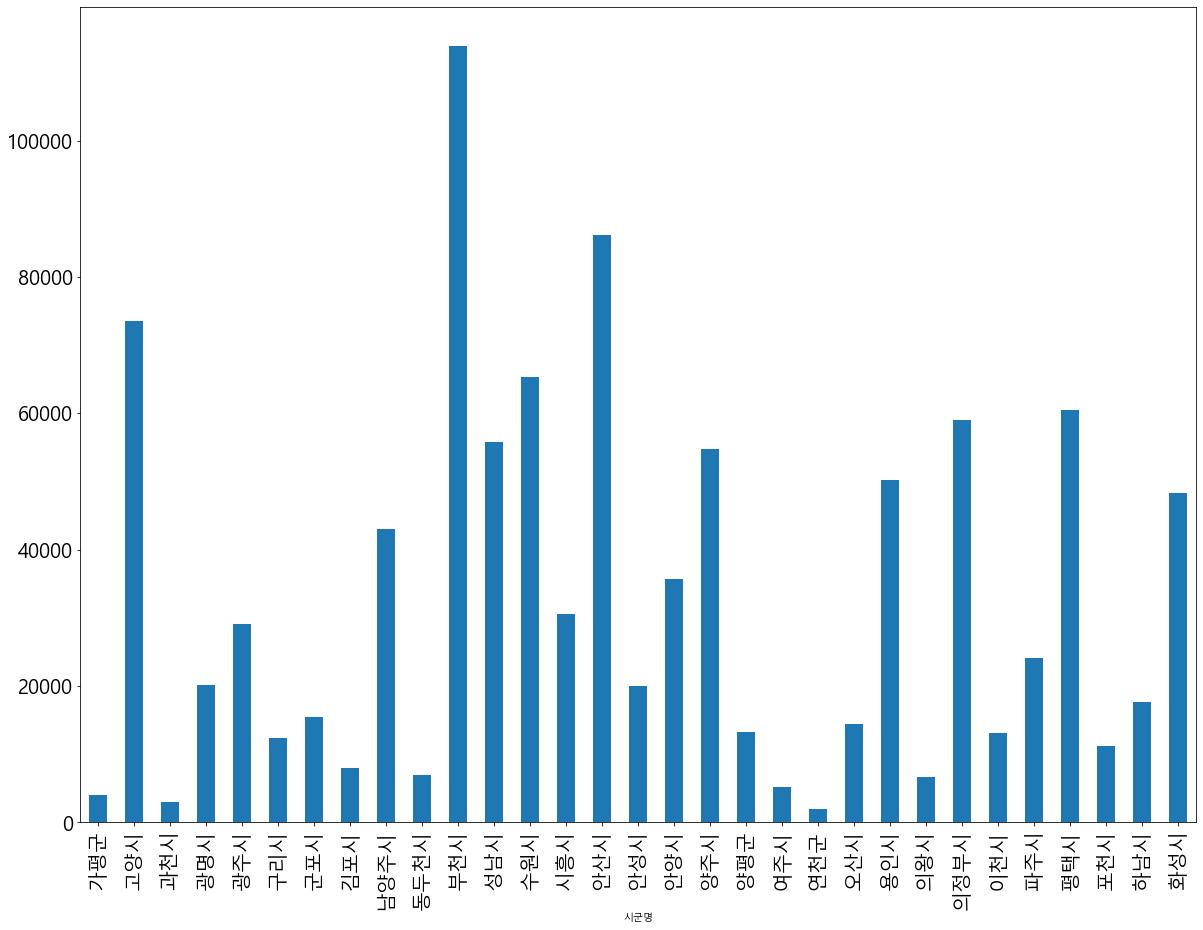

In [93]:
df_total_animal.plot(kind='bar',figsize=(20,15),fontsize=20)

# 한사람당 키우는 반려동물 수

<AxesSubplot:xlabel='시군명'>

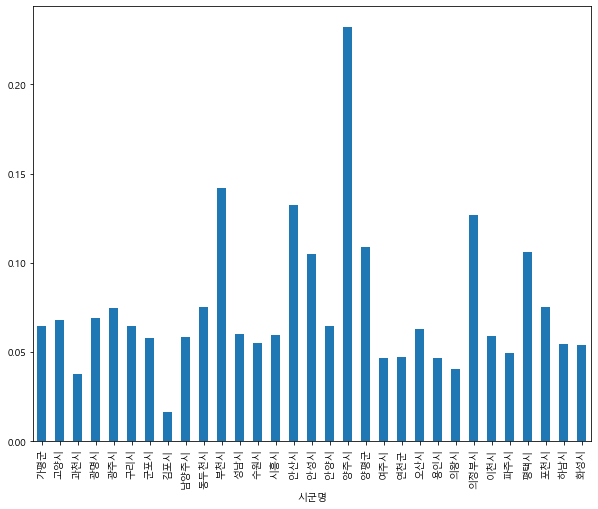

In [97]:
df_total_animal.div(df_total_human).plot(kind='bar',figsize=(10,8),fontsize=10)

# 반려동물 대비 업체 수

<AxesSubplot:xlabel='시군명'>

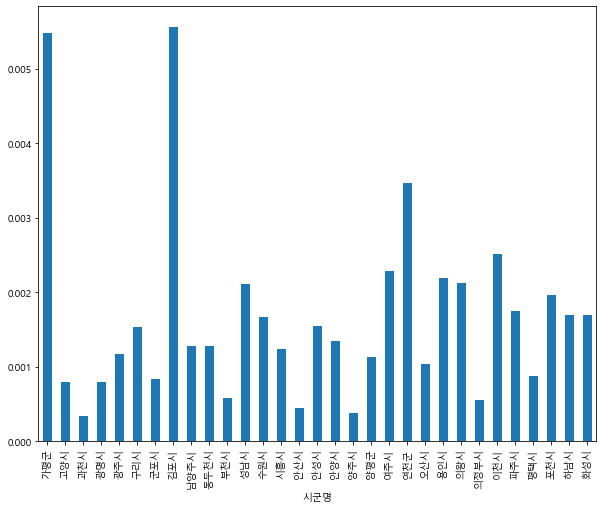

In [98]:
df_total_animal = df_result1['총 동물수']
df_total_store = df_result1['업체수']
df_total_store.div(df_total_animal).plot(kind='bar',figsize=(10,8),fontsize=10)

In [ ]:
fig, axes = plt.subplots(2,2)
plt.subplot(12)
plt.plot(x1,y)
plt.title('y = cos(x)')

plt.subplot(312)
plt.plot(x,y2)
plt.title('y = exp(x)')

plt.subplot(3,1,3)
plt.plot(x,y3)
plt.title('y = cos(x)*exp(y)')

plt.show()

# 결론

    - 두 차트 비교시(지리적 요인으로 인한 부분 배제)
      부천, 양주, 안산시에 반려동물 관련 사업을 한다면 수요가 많을 것이다.
    - 연관계수 만드는 방법?

# 인구수 정리중 팀원에게 인계

In [142]:
csv_population = pd.read_csv('data\주민등록인구집계현황.csv', encoding="cp949")

In [144]:
df_population = pd.DataFrame(csv_population)

In [164]:
df_population1 = df_population[['월','행정구역구분명','행정구역명','총 인구수','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세']]

In [165]:
df_population1

,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세
0,9,도,경기도,13574353,1054380,1327378,1753988,1880750,2286448,2291043,1721533,803681
1,9,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,11043,13153,6834
2,9,읍면동,경기도 가평군 가평읍,19532,1062,1677,2125,1804,2649,3397,3579,1890
3,9,읍면동,경기도 가평군 북면,3821,126,177,224,231,368,694,1054,558
4,9,읍면동,경기도 가평군 상면,5688,153,244,512,389,560,1112,1490,773
...,...,...,...,...,...,...,...,...,...,...,...,...
107481,1,읍면동,경기도 화성시 팔탄면,9900,869,869,1694,1671,1735,1273,922,665
107482,1,읍면동,경기도 화성시 향남읍,21100,2828,2288,3151,4316,3415,2234,1549,996
107483,1,읍면동,경기도 화성시 향남읍,21100,2828,2288,3151,4316,3415,2234,1549,996
107484,1,읍면동,경기도 화성시 화산동,23684,3727,2793,3515,5424,3869,2183,1306,698


In [166]:
mask = df_population1['행정구역구분명'].isin(['시군'])
mask

0         False
1          True
2         False
3         False
4         False
          ...  
107481    False
107482    False
107483    False
107484    False
107485    False
Name: 행정구역구분명, Length: 107486, dtype: bool

In [170]:
mask1 = df_population1['월'].isin([9])
mask1

0          True
1          True
2          True
3          True
4          True
          ...  
107481    False
107482    False
107483    False
107484    False
107485    False
Name: 월, Length: 107486, dtype: bool

In [172]:
df_population2 = df_population1[mask]
df_population3 = df_population2[mask1]

C:\Users\admin\AppData\Local\Temp\ipykernel_22616\1979603847.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_population3 = df_population2[mask1]


In [174]:
df_population3

,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세
1,9,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,11043,13153,6834
8,9,시군,경기도 고양시,1079277,76769,101359,144797,142834,175981,197670,136156,61848
56,9,시군,경기도 과천시,78301,7252,7477,10114,11678,11865,13185,9849,4212
63,9,시군,경기도 광명시,290756,21241,29236,36023,39235,49324,48986,39617,17868
83,9,시군,경기도 광주시,388893,32763,34308,44419,55022,68394,65976,53532,23427
...,...,...,...,...,...,...,...,...,...,...,...,...
101689,9,시군,경기도 파주시,309666,38864,39551,41435,57327,53487,33082,25023,15570
101704,9,시군,경기도 평택시,406463,50356,58442,55304,76102,71693,41872,28980,17973
101727,9,시군,경기도 포천시,159975,16613,21770,20694,24965,29991,19990,14110,8874
101742,9,시군,경기도 하남시,141298,14588,17569,21697,24613,25486,19324,10974,5130


In [175]:
df_population3.set_index('월')

,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세
월,,,,,,,,,,,
9,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,11043,13153,6834
9,시군,경기도 고양시,1079277,76769,101359,144797,142834,175981,197670,136156,61848
9,시군,경기도 과천시,78301,7252,7477,10114,11678,11865,13185,9849,4212
9,시군,경기도 광명시,290756,21241,29236,36023,39235,49324,48986,39617,17868
9,시군,경기도 광주시,388893,32763,34308,44419,55022,68394,65976,53532,23427
...,...,...,...,...,...,...,...,...,...,...,...
9,시군,경기도 파주시,309666,38864,39551,41435,57327,53487,33082,25023,15570
9,시군,경기도 평택시,406463,50356,58442,55304,76102,71693,41872,28980,17973
9,시군,경기도 포천시,159975,16613,21770,20694,24965,29991,19990,14110,8874


In [177]:
del df_population3['월']

In [180]:
df_population3
del df_population3['행정구역구분명']
df_population3

KeyError: '행정구역구분명'

In [185]:
df_population3.set_index('행정구역명', inplace = True)

KeyError: "None of ['행정구역명'] are in the columns"

In [186]:
df_population3

,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세
행정구역명,,,,,,,,,
경기도 가평군,62168,3047,4471,6009,5406,7722,11043,13153,6834
경기도 고양시,1079277,76769,101359,144797,142834,175981,197670,136156,61848
경기도 과천시,78301,7252,7477,10114,11678,11865,13185,9849,4212
경기도 광명시,290756,21241,29236,36023,39235,49324,48986,39617,17868
경기도 광주시,388893,32763,34308,44419,55022,68394,65976,53532,23427
...,...,...,...,...,...,...,...,...,...
경기도 파주시,309666,38864,39551,41435,57327,53487,33082,25023,15570
경기도 평택시,406463,50356,58442,55304,76102,71693,41872,28980,17973
경기도 포천시,159975,16613,21770,20694,24965,29991,19990,14110,8874


In [ ]:
####################################################################################################################################

In [99]:
# message